
## INSTRUCTOR: DR ZEESHAN GILLANI

## Assignmnet 1: Machine Learning 


Iteration 0: Cost 0.4855553785907672
Iteration 100: Cost 0.18949757872900125
Iteration 200: Cost 0.18424208673402548
Iteration 300: Cost 0.18366822149227693
Iteration 400: Cost 0.18351294825239278
Iteration 500: Cost 0.18346631431283109
Iteration 600: Cost 0.18345188021420802
Iteration 700: Cost 0.18344730976995083
Iteration 800: Cost 0.18344583185300312
Iteration 900: Cost 0.18344534428203801
Learning Rate: 0.01
Final parameters - b: 0.00, w: [1.40678498e-16 3.05840683e-01 7.64723248e-02 2.84553015e-01
 1.82401961e-01 1.12089048e-01 1.17046493e-01 2.14819653e-01
 1.45523132e-01]
Accuracy: 0.632435206634352
Iteration 0: Cost 0.45940546700803064
Iteration 100: Cost 0.18365789837530705
Iteration 200: Cost 0.18345147238508064
Iteration 300: Cost 0.18344532631256935
Iteration 400: Cost 0.18344510390708121
Iteration 500: Cost 0.18344509454185212
Iteration 600: Cost 0.1834450941063475
Iteration 700: Cost 0.18344509408496884
Iteration 800: Cost 0.1834450940838913
Iteration 900: Cost 0.1834450

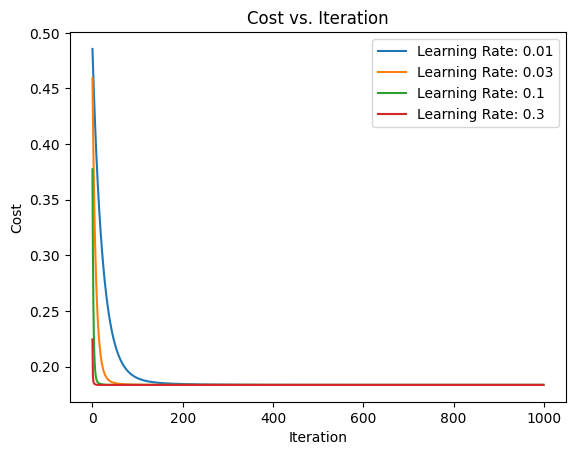

In [12]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('housing_data.csv')

# Feature scaling
data = (data - data.mean()) / data.std()

# Extract the features and the target variable
X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',  'airconditioning', 'parking', ]].values
y = data['price'].values

# Add a column of ones to X to account for the intercept term
X = np.c_[np.ones(X.shape[0]), X]

# Apply multiple linear regression cost function and gradient descent

def compute_cost(X, y, w, b):
    m = X.shape[0]
    predictions = np.dot(X, w) + b
    cost = np.sum((predictions - y) ** 2) / (2 * m)
    return cost

def compute_gradient(X, y, w, b):
    m = X.shape[0]
    predictions = np.dot(X, w) + b
    errors = predictions - y
    grad_w = np.dot(X.T, errors) / m
    grad_b = np.sum(errors) / m
    return grad_w, grad_b

def gradient_descent(X, y, w, b, alpha, iterations):
    J_history = []
    for i in range(iterations):
        grad_w, grad_b = compute_gradient(X, y, w, b)
        w -= alpha * grad_w
        b -= alpha * grad_b
        cost = compute_cost(X, y, w, b)
        J_history.append(cost)
        if i % 100 == 0:
            print(f'Iteration {i}: Cost {cost}')
    return w, b, J_history

# Different learning rates to test
learning_rates = [0.01, 0.03, 0.1, 0.3]

for alpha in learning_rates:
    # initialize parameters
    initial_w = np.zeros(X.shape[1])
    initial_b = 0.0

    # some gradient descent settings
    iterations = 1000

    # run gradient descent
    w_final, b_final, J_hist = gradient_descent(X, y, initial_w, initial_b, alpha, iterations)

    print(f"Learning Rate: {alpha}")
    print(f"Final parameters - b: {b_final:.2f}, w: {w_final}")

    # Calculate and print accuracy based on Mean Squared Error
    y_pred = np.dot(X, w_final) + b_final
    mse = np.mean((y_pred - y) ** 2)
    accuracy = 1 - mse / np.var(y)
    print(f"Accuracy: {accuracy}")

    # plot cost versus iteration
    plt.plot(J_hist, label=f'Learning Rate: {alpha}')

plt.title("Cost vs. Iteration")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.legend()
plt.show()


 *Accuracy of the model is 0.63*
 by droping the columns which have more categorical data and change yes and no to 1 and 0 respectively